<a href="https://colab.research.google.com/github/Emmahgithub/Analisis-Numerico-2025-1/blob/main/22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="Teal" face="Comic Sans MS,arial">
  <h1 align="center"><i>Tarea 1 Analisis Numerico</i></h1>
  </font>
  <font color="Blue" face="Comic Sans MS,arial">
  <h5 align="center"><i>MARTINEZ ROSAS ZAYDE YAMILE</i></h5>
  <h5 align="center"><i>CAMACHO MARIN ANA KAREN</i></h5>
  <h5 align="center"><i>LÓPEZ AGUIRRE ROBERTO OCELOTZIN</i></h5>
  <h5 align="center"><i>VARGAS BAUTISTA EMMANUEL</i></h5>
  </font>


#Inciso a)

Cuando se aplica eliminación gaussiana con pivoteo parcial, se intercambian las filas de la matriz para colocar en la diagonal el elemento con mayor valor absoluto en la columna actual (a partir de la fila actual). Eso evita divisiones por números muy pequeños, reduciendo errores numéricos. En la matriz
𝐴 seleccionada
A, ya que es triangular inferior con unos en la diagonal, el pivoteo parcial no cambia el orden de las filas, porque ya está bien ordenada. Por tanto, el algoritmo sigue con los mismos pasos que sin pivoteo, pero con mayor exactitud al resolver.

Tamaño 5x5:
  - Número de condición: 2.224

Tamaño 10x10:
  - Número de condición: 4.385

Tamaño 20x20:
  - Número de condición: 8.834

Tamaño 50x50:
  - Número de condición: 22.31

Tamaño 100x100:
  - Número de condición: 44.8



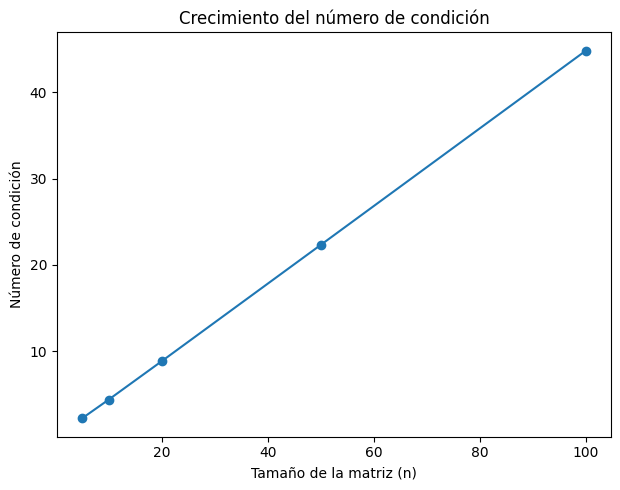

In [ ]:
#Inciso b)

import numpy as np
import matplotlib.pyplot as plt

#Basicamente es un sistema que sigue el patron de generar una matriz inferior de tal manera que abajo de la diagolnal todo sea -1 y la ultima columna sean 1s
def construir_matriz(n):
    """Construye la matriz A de tamaño nxn con el patrón dado"""
    A = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if j < i:
                A[i, j] = -1
            elif j == i:
                A[i, j] = 1
            elif j == n-1:
                A[i, j] = 1
    return A

#Generamos nuestro vector b como dice usando cualquier criterio para hacerlo sencillo use uno de 1 y -1 basicamente intercambiando consecutivamente
def generar_vector_b(n):
    """Genera un vector b para pruebas"""
    return np.array([1 if i % 2 == 0 else -1 for i in range(n)], dtype=float)


#basicamente la misma eliminacion gauseana con pequeños cambios para que se haga un tipo de pivoteo parcial (inspirado en el codigo de pivoteo parcial del ayudante)

def gauss_pivoteo_parcial(A, b):
    A = A.copy().astype(float)
    b = b.copy().astype(float)
    n = len(b)

    for k in range(n-1):
        # Encontrar el índice del mayor valor absoluto en la columna k
        max_row = np.argmax(np.abs(A[k:, k])) + k

        # Intercambio de filas
        if k != max_row:
            A[[k, max_row]] = A[[max_row, k]]
            b[[k, max_row]] = b[[max_row, k]]

        for i in range(k+1, n):
            factor = A[i, k] / A[k, k]
            A[i, k:] -= factor * A[k, k:]
            b[i] -= factor * b[k]

    return A, b

#la sustitucion atres clasica que se a estado usando desde el inicio

def sustitucion_atras(U, b):
    n = len(b)
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = (b[i] - np.dot(U[i, i+1:], x[i+1:])) / U[i, i]
    return x

#Una funcion q aplica los dos anteriores

def resolver_sistema(A, b):
    """Resuelve el sistema Ax=b usando eliminación Gaussiana con pivoteo parcial"""
    U, b_mod = gauss_pivoteo_parcial(A, b)
    x = sustitucion_atras(U, b_mod)
    return x

# Análisis para diferentes tamaños como se indica
tamaños = [5, 10, 20, 50, 100]
condiciones = []

for n in tamaños:
    # Construir matriz y vector b
    A = construir_matriz(n)
    b = generar_vector_b(n)
    # Calcular número de condición
    cond_num = np.linalg.cond(A)
    condiciones.append(cond_num)

    # Resolver sistema
    x = resolver_sistema(A, b)

    print(f"Tamaño {n}x{n}:")
    print(f"  - Número de condición: {cond_num:.4}")
    print()

# Graficar resultados
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(tamaños, condiciones, 'o-')
plt.xlabel('Tamaño de la matriz (n)')
plt.ylabel('Número de condición')
plt.title('Crecimiento del número de condición')

plt.tight_layout()
plt.show()

In [ ]:
#inciso c)
#Practicamente todo es codigo reutilizado de las clases a excepcion de como hice que se mostraran los resultados y ligeros cambios para obtener y mostrar todas las matrices usadas tales como las de permutacion L y U
import numpy as np

def Permutaciones(A, b):
    n = A.shape[0]
    U = np.copy(A).astype(float)
    x = np.copy(b).astype(float)
    P = np.eye(n)
    Q = np.eye(n)
    L = np.eye(n)  # Matriz L que construiremos durante el proceso

    for k in range(n - 1):
        # Encontrar el pivote máximo en la submatriz
        max_row, max_col = np.unravel_index(np.argmax(np.abs(U[k:, k:])),
                          (n - k, n - k))
        max_row += k
        max_col += k

        # Intercambiar filas
        if k != max_row:
            U[[k, max_row]] = U[[max_row, k]]
            P[[k, max_row]] = P[[max_row, k]]
            if k > 0:
                L[[k, max_row], :k] = L[[max_row, k], :k]

        # Intercambiar columnas
        if k != max_col:
            U[:, [k, max_col]] = U[:, [max_col, k]]
            Q[:, [k, max_col]] = Q[:, [max_col, k]]
            if k > 0:
                L[:k, [k, max_col]] = L[:k, [max_col, k]]

        # Eliminación gaussiana
        for i in range(k + 1, n):
            L[i, k] = U[i, k] / U[k, k]
            U[i, k:] -= L[i, k] * U[k, k:]

    return P, Q, L, U

def SolverLU(A, b):
    """Resuelve el sistema LUx = b"""
    n = len(b)
    y = np.zeros(n)
    x = np.zeros(n)

    # Sustitución hacia adelante para Ly = b
    for i in range(n):
        y[i] = b[i] - np.dot(A[i, :i], y[:i])

    # Sustitución hacia atrás para Ux = y
    for i in range(n-1, -1, -1):
        x[i] = (y[i] - np.dot(A[i, i+1:], x[i+1:])) / A[i, i]

    return x

def Solver_LU_Pivot_Total(A, b):
    """Resuelve Ax = b usando factorización LU con pivoteo total"""
    P, Q, L, U = Permutaciones(A, b)

    # Resolver Ly = Pb
    y = SolverLU(L, P @ b)

    # Resolver Uz = y
    z = SolverLU(U, y)

    # Aplicar permutación de columnas
    x = Q @ z

    return x

# Función para verificar la factorización
def verificar_factorizacion(A, P, Q, L, U):
    """Verifica que PAQ = LU"""
    n = A.shape[0]
    error = np.linalg.norm(P @ A @ Q - L @ U) / np.linalg.norm(A)
    print(f"Error en la factorización PAQ = LU: {error:.2e}")
    return error < 1e-10

# Ejemplo de uso con la matriz del problema
A = np.array([[1, 0, 0, 0, 1],
              [-1, 1, 0, 0, 1],
              [-1, -1, 1, 0, 1],
              [-1, -1, -1, 1, 1],
              [-1, -1, -1, -1, 1]])

b = np.array([1, 1, 1, 1, 1])

# Resolver el sistema
x = Solver_LU_Pivot_Total(A, b)
print("Solución x:", x)

# Verificar la solución
print("Verificación Ax - b:", np.linalg.norm(A @ x - b))

# Obtener y verificar la factorización
P, Q, L, U = Permutaciones(A, b)
verificar_factorizacion(A, P, Q, L, U)

# Mostrar las matrices de la factorización
print("\nMatriz P (permutación filas):")
print(P)
print("\nMatriz Q (permutación columnas):")
print(Q)
print("\nMatriz L:")
print(L)
print("\nMatriz U:")
print(U)

Solución x: [0. 0. 0. 0. 1.]
Verificación Ax - b: 0.0
Error en la factorización PAQ = LU: 0.00e+00

Matriz P (permutación filas):
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]

Matriz Q (permutación columnas):
[[1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]]

Matriz L:
[[ 1.  0.  0.  0.  0.]
 [-1.  1.  0.  0.  0.]
 [-1.  1.  1.  0.  0.]
 [-1.  1.  1.  1.  0.]
 [-1.  1.  1.  1.  1.]]

Matriz U:
[[ 1.  1.  0.  0.  0.]
 [ 0.  2.  1.  0.  0.]
 [ 0.  0. -2.  1.  0.]
 [ 0.  0.  0. -2.  1.]
 [ 0.  0.  0.  0. -2.]]
